<a href="https://colab.research.google.com/github/fzehrauslu/ArtificaNeuralNetworkExamples/blob/master/ANNAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import random
import seaborn as sb
#from sklearn.datasets import load_breast_cancer

Q. (10 p) Load Fashion mnist dataset

In [0]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX=np.reshape(trainX,(-1,28*28))
testX=np.reshape(testX,(-1,28*28))

Q. (10 p) Train a random forest with 10 decision trees (5 p) Assign 3 for the maximum depth of each tree.(5 p) Calculate  precision, recall, f1 score and (5 p) accuracy for both training and test datasets.

In [6]:
#  Using Random Forest without hyper parameter tuning and clustering 
rf = RandomForestClassifier(n_estimators=10,max_depth=3)

rf.fit(trainX, trainY)
# Predictions on training dataset
y_pred_train = rf.predict(trainX)
# predictions for test dataset
y_pred_test = rf.predict(testX)
# Performance  metrics for training dataset
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= trainY, y_pred= y_pred_train))
    
# Performance  metrics for test dataset
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= testY, y_pred= y_pred_test))



Training metrics:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6000
           1       0.95      0.85      0.90      6000
           2       0.36      0.92      0.52      6000
           3       0.63      0.81      0.71      6000
           4       0.54      0.08      0.13      6000
           5       0.90      0.66      0.76      6000
           6       0.30      0.00      0.00      6000
           7       0.70      0.86      0.77      6000
           8       0.86      0.83      0.85      6000
           9       0.79      0.91      0.85      6000

    accuracy                           0.67     60000
   macro avg       0.68      0.67      0.62     60000
weighted avg       0.68      0.67      0.62     60000

Test data metrics:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1000
           1       0.96      0.83      0.89      1000
           2       0.36      0.92      0.

In [7]:
sklearn.metrics.accuracy_score(trainY,  y_pred_train)

0.6681

In [8]:
sklearn.metrics.accuracy_score(testY,  y_pred_test)

0.6587

Q. (20 p) Plot a feature importance diagram for the trained model, which shows importance of each feature in the classification task. 

In [0]:
importances = rf.feature_importances_

Feature ranking:
1. feature 462 (0.074086)
2. feature 150 (0.059438)
3. feature 207 (0.056902)
4. feature 406 (0.041800)
5. feature 610 (0.034940)
6. feature 600 (0.032042)
7. feature 235 (0.029347)
8. feature 179 (0.029126)
9. feature 546 (0.028031)
10. feature 68 (0.027751)
11. feature 262 (0.027527)
12. feature 123 (0.027455)
13. feature 149 (0.027292)
14. feature 246 (0.026762)
15. feature 602 (0.024436)
16. feature 518 (0.023861)
17. feature 397 (0.019020)
18. feature 441 (0.018005)
19. feature 510 (0.017253)
20. feature 442 (0.017202)
21. feature 342 (0.016766)
22. feature 369 (0.016241)
23. feature 201 (0.015640)
24. feature 413 (0.015003)
25. feature 205 (0.014106)
26. feature 628 (0.014002)
27. feature 144 (0.013754)
28. feature 213 (0.013729)
29. feature 202 (0.013471)
30. feature 162 (0.013357)
31. feature 581 (0.012827)
32. feature 362 (0.012378)
33. feature 184 (0.012100)
34. feature 399 (0.011849)
35. feature 103 (0.011622)
36. feature 92 (0.011110)
37. feature 258 (0.010

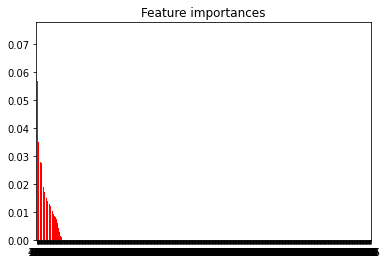

In [10]:
import matplotlib.pyplot as plt
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(trainX.shape[1]):
    if importances[indices[f]]>0:
      print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(trainX.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(trainX.shape[1]), indices)
plt.xlim([-1, trainX.shape[1]])
plt.show()


Q.(10 p) Use grid search method to find the optimum parameters for random forest (GridSearchCV in python) for the classification task. Search (5 p) the optimum number of decision trees in the range of [10,50], (5 p) that of minimum number of examples at each leaf in the range of [2,3], and (5 p) that of maximum depth in the range of [3,10]. (5 p) Calculate  precision, recall, f1 score and (5 p) accuracy for both training and test datasets.  

In [11]:
clf = GridSearchCV(rf, param_grid={'n_estimators':[10,50],'min_samples_leaf':[2,3],'max_depth':[3,10]})
model = clf.fit(trainX, trainY)


y_pred_train = model.predict(trainX)
    # predictions for validation
y_pred_test = model.predict(testX)
    # training metrics
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= trainY, y_pred= y_pred_train))
    

# Predictions on testset
y_pred_test = model.predict(testX)
    # test data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= testY, y_pred= y_pred_test))

Training metrics:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6000
           1       1.00      0.96      0.98      6000
           2       0.77      0.76      0.77      6000
           3       0.86      0.93      0.89      6000
           4       0.72      0.85      0.78      6000
           5       0.99      0.95      0.97      6000
           6       0.81      0.58      0.67      6000
           7       0.92      0.94      0.93      6000
           8       0.97      0.98      0.98      6000
           9       0.94      0.95      0.94      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000

Test data metrics:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.94      0.96      1000
           2       0.70      0.72      0.

In [12]:
sklearn.metrics.accuracy_score(trainY,  y_pred_train)

0.8787333333333334

In [13]:
sklearn.metrics.accuracy_score(testY,  y_pred_test)

0.8441

Q.(10 p)Print the optimum parameters of random forest, obtained by the grid search method for the classification problem. 

In [14]:
model.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 50}